# Customer Lifetime Value Prediction

Building a regression model to predict the lifetime value of a customer based on their historical behaviour.

Dataset: *online-retail.csv*

In [514]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [515]:
clv_data = pd.read_csv('https://raw.githubusercontent.com/vishwak05/Gradious-Assignments/refs/heads/main/ML%20Algo/Assignment-1/online_retail_II.csv')
clv_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [516]:
clv_data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [517]:
clv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [518]:
# Dropping unecessary columns
clv_data.drop(columns=['Description'], inplace=True)

In [519]:
clv_data[clv_data.duplicated()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...
1067136,581538,22068,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [520]:
# Dropping duplicate rows
clv_data.drop_duplicates(inplace=True)

In [521]:
clv_data.isna().sum()

,0
Invoice,0
StockCode,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,235151
Country,0


In [522]:
# Dropping null rows
clv_data.dropna(inplace=True)

In [523]:
for col in clv_data.columns:
    print(clv_data[col].value_counts(), end='\n\n')

Invoice
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
547384       1
547391       1
C489543      1
C581470      1
581479       1
Name: count, Length: 44876, dtype: int64

StockCode
85123A    5156
22423     3678
85099B    3380
84879     2709
20725     2686
          ... 
79303A       1
48173A       1
35822B       1
35822P       1
23449        1
Name: count, Length: 4646, dtype: int64

Quantity
 1       141644
 12      117424
 2       114536
 6        78247
 4        60912
          ...  
 394          1
 1920         1
 3960         1
-246          1
-1536         1
Name: count, Length: 643, dtype: int64

InvoiceDate
2011-11-14 15:27:00    543
2011-11-28 15:54:00    534
2011-12-05 17:17:00    530
2011-11-23 13:39:00    444
2011-10-31 14:09:00    436
                      ... 
2009-12-01 13:48:00      1
2009-12-01 16:48:00      1
2009-12-01 16:05:00      1
2011-12-09 11:57:00      1
2011-12-09 11:50:00      1
Name: count, Length: 41439, dtype: 

In [524]:
clv_data.loc[(clv_data['Quantity'] <= 0) | (clv_data['Price'] <= 0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...
1065910,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [525]:
# Dropping rows with negative quantity and price
clv_data.drop(clv_data.loc[(clv_data['Quantity'] <= 0) | (clv_data['Price'] <= 0)].index, inplace=True)

In [526]:
clv_data.loc[(clv_data['Quantity'] <= 0) | (clv_data['Price'] <= 0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country


In [527]:
clv_data.describe()

,Quantity,Price,Customer ID
count,779423.000000,779423.000000,779423.000000
mean,13.489016,3.218488,15320.366620
std,145.855640,29.676178,1695.690591
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15247.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,10953.500000,18287.000000


In [531]:
# Creating new feature totalprice
clv_data['TotalPrice'] = clv_data['Price'] * clv_data['Quantity']

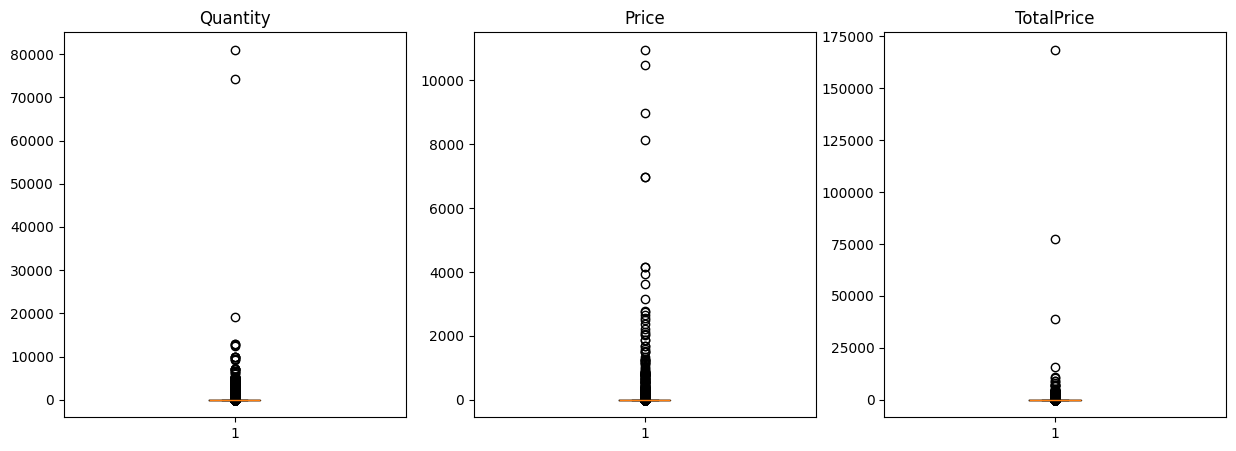

In [532]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['Quantity', 'Price', 'TotalPrice']):
    plt.subplot(1,3,i+1)
    plt.boxplot(x=clv_data[col])
    plt.title(col)
plt.show()

In [536]:
clv_data[clv_data['StockCode'].astype(str).apply(lambda x: x.isalpha())]['StockCode'].value_counts()

,count
StockCode,
POST,1803
M,681
ADJUST,32
PADS,17
DOT,16
D,5


In [537]:
# Dropping rows with unecessary stock code
clv_data.drop(clv_data[clv_data['StockCode'].astype(str).apply(lambda x: x.isalpha())].index, inplace=True)

In [538]:
clv_data[clv_data['StockCode'].astype(str).apply(lambda x: x.isalpha())]['StockCode'].value_counts()

,count
StockCode,


In [539]:
clv_data = clv_data.rename(columns={'Customer ID': 'CustomerID'})

In [540]:
clv_data['InvoiceDate'] = pd.to_datetime(clv_data['InvoiceDate'])

In [541]:
clv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776869 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776869 non-null  object        
 1   StockCode    776869 non-null  object        
 2   Quantity     776869 non-null  int64         
 3   InvoiceDate  776869 non-null  datetime64[ns]
 4   Price        776869 non-null  float64       
 5   CustomerID   776869 non-null  float64       
 6   Country      776869 non-null  object        
 7   TotalPrice   776869 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 53.3+ MB


In [542]:
clv_data = clv_data.astype({col: 'int32' for col in clv_data.select_dtypes(include='number')})

In [543]:
clv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776869 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776869 non-null  object        
 1   StockCode    776869 non-null  object        
 2   Quantity     776869 non-null  int32         
 3   InvoiceDate  776869 non-null  datetime64[ns]
 4   Price        776869 non-null  int32         
 5   CustomerID   776869 non-null  int32         
 6   Country      776869 non-null  object        
 7   TotalPrice   776869 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(3)
memory usage: 41.5+ MB


In [544]:
clv_data.describe()

,Quantity,InvoiceDate,Price,CustomerID,TotalPrice
count,776869.000000,776869,776869.000000,776869.000000,776869.000000
mean,13.514208,2011-01-03 00:45:15.948634368,2.354611,15326.386807,21.495906
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,2.000000,2010-07-02 14:37:00,1.000000,13979.000000,4.000000
50%,6.000000,2010-12-02 13:49:00,1.000000,15252.000000,12.000000
75%,12.000000,2011-08-01 13:31:00,3.000000,16795.000000,19.000000
max,80995.000000,2011-12-09 12:50:00,649.000000,18287.000000,168469.000000
std,146.069073,NaN,4.368975,1692.707497,225.900023


In [545]:
min_date = clv_data['InvoiceDate'].min()
max_date = clv_data['InvoiceDate'].max()

min_date, max_date

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [546]:
mid_date = '2010-08-01'

In [547]:
# Splitting dataset into 2 parts before and after date: 2010-08-01

clv_data_first = clv_data[clv_data['InvoiceDate'] < mid_date]
clv_data_last = clv_data[clv_data['InvoiceDate'] >= mid_date]

In [548]:
clv_data_first

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6,13085,United Kingdom,83
1,489434,79323P,12,2009-12-01 07:45:00,6,13085,United Kingdom,81
2,489434,79323W,12,2009-12-01 07:45:00,6,13085,United Kingdom,81
3,489434,22041,48,2009-12-01 07:45:00,2,13085,United Kingdom,100
4,489434,21232,24,2009-12-01 07:45:00,1,13085,United Kingdom,30
...,...,...,...,...,...,...,...,...
290422,517704,22659,6,2010-07-30 17:08:00,1,14031,United Kingdom,11
290423,517704,21658,3,2010-07-30 17:08:00,3,14031,United Kingdom,11
290424,517704,22328,8,2010-07-30 17:08:00,2,14031,United Kingdom,23
290425,517704,37370,72,2010-07-30 17:08:00,1,14031,United Kingdom,76


In [549]:
clv_data_last

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalPrice
290429,517707,22066,2,2010-08-01 10:06:00,1,12843,United Kingdom,2
290430,517707,21889,1,2010-08-01 10:06:00,1,12843,United Kingdom,1
290431,517708,22415,2,2010-08-01 10:09:00,7,17243,United Kingdom,15
290432,517708,22470,4,2010-08-01 10:09:00,2,17243,United Kingdom,11
290433,517708,22483,2,2010-08-01 10:09:00,2,17243,United Kingdom,5
...,...,...,...,...,...,...,...,...
1067365,581587,22613,12,2011-12-09 12:50:00,0,12680,France,10
1067366,581587,22899,6,2011-12-09 12:50:00,2,12680,France,12
1067367,581587,23254,4,2011-12-09 12:50:00,4,12680,France,16
1067368,581587,23255,4,2011-12-09 12:50:00,4,12680,France,16


### Performing RFM Analysis on Customer data

In [550]:
# Calculating Recency, Frequency, Monetary values of each customer from first data

last_date = clv_data_first['InvoiceDate'].max()

rfm_df = clv_data_first.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})
rfm_df

,InvoiceDate,Invoice,TotalPrice
CustomerID,,,
12346,32,11,356
12349,92,1,1044
12355,70,1,481
12358,53,2,1682
12359,38,5,1973
...,...,...,...
18281,80,1,117
18283,124,3,260
18285,163,1,421


In [551]:
rfm_df.reset_index(inplace=True)
rfm_df.rename(columns={'InvoiceDate': 'recency', 'Invoice': 'frequency', 'TotalPrice': 'monetary'}, inplace=True)
rfm_df

,CustomerID,recency,frequency,monetary
0,12346,32,11,356
1,12349,92,1,1044
2,12355,70,1,481
3,12358,53,2,1682
4,12359,38,5,1973
...,...,...,...,...
3132,18281,80,1,117
3133,18283,124,3,260
3134,18285,163,1,421
3135,18286,226,1,457


In [552]:
# ordering cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [553]:
# Clustering RFM values using K-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

kmeans.fit(rfm_df[['recency']])
rfm_df['recency_cluster'] = kmeans.predict(rfm_df[['recency']])
rfm_df = order_cluster('recency_cluster', 'recency', rfm_df, False)

In [554]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(rfm_df[['frequency']])
rfm_df['frequency_cluster'] = kmeans.predict(rfm_df[['frequency']])
rfm_df = order_cluster('frequency_cluster', 'frequency', rfm_df, True)

In [555]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(rfm_df[['monetary']])
rfm_df['monetary_cluster'] = kmeans.predict(rfm_df[['monetary']])
rfm_df = order_cluster('monetary_cluster', 'monetary', rfm_df, True)

In [556]:
rfm_df

,CustomerID,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster
0,12346,32,11,356,3,1,0
1,12349,92,1,1044,2,0,0
2,12355,70,1,481,2,0,0
3,12358,53,2,1682,2,0,0
4,12359,38,5,1973,3,1,0
...,...,...,...,...,...,...,...
3132,18281,80,1,117,2,0,0
3133,18283,124,3,260,1,0,0
3134,18285,163,1,421,1,0,0
3135,18286,226,1,457,0,0,0


In [557]:
rfm_df.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,327.0,214.954128,22.226960,178.0,191.5,226.0,234.0,241.0
1,572.0,139.258741,19.106106,108.0,124.0,136.0,154.0,177.0
2,903.0,74.924695,17.206225,48.0,59.0,74.0,91.0,107.0
3,1335.0,20.253184,14.371397,0.0,7.0,18.0,32.0,47.0


In [558]:
rfm_df.groupby('frequency_cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,2290.0,1.606987,0.753117,1.0,1.0,1.0,2.0,3.0
1,729.0,5.748971,1.881468,4.0,4.0,5.0,7.0,11.0
2,101.0,17.247525,5.948791,12.0,13.0,15.0,19.0,36.0
3,17.0,58.470588,15.301624,38.0,46.0,56.0,64.0,88.0


In [559]:
rfm_df.groupby('monetary_cluster')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,3014.0,855.516921,922.094666,2.0,236.0,509.0,1141.75,5182.0
1,108.0,9690.148148,4624.648907,5332.0,6302.5,7957.0,10747.25,23728.0
2,11.0,39820.181818,11782.051747,28075.0,31158.5,35199.0,45170.00,68453.0
3,4.0,149126.250000,50542.938190,106449.0,125889.0,133825.0,157062.25,222406.0


In [560]:
# Creating a score to segment customer based on RFM values (high score is high value customer)
# Segementing customers into 3 groups based overall score

rfm_df['overall_score'] =rfm_df['recency_cluster'] + rfm_df['frequency_cluster'] + rfm_df['monetary_cluster']

rfm_df['segment'] = 'low-value'

rfm_df.loc[rfm_df['overall_score'] > 2, 'segment'] = 'mid-value'
rfm_df.loc[rfm_df['overall_score'] > 4, 'segment'] = 'high-value'

In [561]:
rfm_df

,CustomerID,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,overall_score,segment
0,12346,32,11,356,3,1,0,4,mid-value
1,12349,92,1,1044,2,0,0,2,low-value
2,12355,70,1,481,2,0,0,2,low-value
3,12358,53,2,1682,2,0,0,2,low-value
4,12359,38,5,1973,3,1,0,4,mid-value
...,...,...,...,...,...,...,...,...,...
3132,18281,80,1,117,2,0,0,2,low-value
3133,18283,124,3,260,1,0,0,1,low-value
3134,18285,163,1,421,1,0,0,1,low-value
3135,18286,226,1,457,0,0,0,0,low-value


In [562]:
rfm_df.groupby('overall_score')[['recency', 'frequency', 'monetary']].mean()

,recency,frequency,monetary
overall_score,,,
0,215.182663,1.210526,333.148607
1,140.029520,1.413284,443.725092
2,78.654096,1.795839,629.278283
3,31.977300,2.470729,871.181601
4,20.210425,5.874517,2061.306950
5,12.782051,12.141026,5640.884615
6,8.040000,19.540000,10377.640000
7,8.800000,39.800000,22821.200000
8,3.666667,67.500000,41174.333333


In [563]:
rfm_df['segment'].value_counts()

,count
segment,
low-value,1634
mid-value,1355
high-value,148


In [564]:
# Calculating monetary values from last dataset (2010-2011)

monetary_df_last = clv_data_last.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df_last = monetary_df_last.rename(columns={'TotalPrice': 'LastMonthMonatery'})
monetary_df_last

,CustomerID,LastMonthMonatery
0,12346,77183
1,12347,4846
2,12348,1638
3,12349,2541
4,12350,289
...,...,...
5153,18282,171
5154,18283,1900
5155,18284,455
5156,18286,807


In [565]:
# Removing outliers
monetary_last_df = monetary_df_last[monetary_df_last['LastMonthMonatery'] <= monetary_df_last['LastMonthMonatery'].quantile(0.99)]

In [566]:
# Merging rfm data of (2009-2010) and monetary data from (2010-2011)
rfm_df_final = pd.merge(rfm_df, monetary_last_df, on='CustomerID', how='inner')

In [567]:
rfm_df_final['CustomerID'] = rfm_df_final['CustomerID'].astype('object')
rfm_df_final

,CustomerID,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,overall_score,segment,LastMonthMonatery
0,12349,92,1,1044,2,0,0,2,low-value,2541
1,12355,70,1,481,2,0,0,2,low-value,453
2,12358,53,2,1682,2,0,0,2,low-value,1728
3,12359,38,5,1973,3,1,0,4,mid-value,6714
4,12360,66,2,603,2,0,0,2,low-value,2919
...,...,...,...,...,...,...,...,...,...,...
2393,18276,22,3,665,3,0,0,3,mid-value,959
2394,18281,80,1,117,2,0,0,2,low-value,78
2395,18283,124,3,260,1,0,0,1,low-value,1900
2396,18286,226,1,457,0,0,0,0,low-value,807


In [568]:
rfm_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         2398 non-null   object
 1   recency            2398 non-null   int64 
 2   frequency          2398 non-null   int64 
 3   monetary           2398 non-null   int32 
 4   recency_cluster    2398 non-null   int64 
 5   frequency_cluster  2398 non-null   int64 
 6   monetary_cluster   2398 non-null   int64 
 7   overall_score      2398 non-null   int64 
 8   segment            2398 non-null   object
 9   LastMonthMonatery  2398 non-null   int32 
dtypes: int32(2), int64(6), object(2)
memory usage: 168.7+ KB


In [569]:
clv_data_ml = rfm_df_final.copy()

In [570]:
clv_data_ml

,CustomerID,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,overall_score,segment,LastMonthMonatery
0,12349,92,1,1044,2,0,0,2,low-value,2541
1,12355,70,1,481,2,0,0,2,low-value,453
2,12358,53,2,1682,2,0,0,2,low-value,1728
3,12359,38,5,1973,3,1,0,4,mid-value,6714
4,12360,66,2,603,2,0,0,2,low-value,2919
...,...,...,...,...,...,...,...,...,...,...
2393,18276,22,3,665,3,0,0,3,mid-value,959
2394,18281,80,1,117,2,0,0,2,low-value,78
2395,18283,124,3,260,1,0,0,1,low-value,1900
2396,18286,226,1,457,0,0,0,0,low-value,807


In [571]:
clv_data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         2398 non-null   object
 1   recency            2398 non-null   int64 
 2   frequency          2398 non-null   int64 
 3   monetary           2398 non-null   int32 
 4   recency_cluster    2398 non-null   int64 
 5   frequency_cluster  2398 non-null   int64 
 6   monetary_cluster   2398 non-null   int64 
 7   overall_score      2398 non-null   int64 
 8   segment            2398 non-null   object
 9   LastMonthMonatery  2398 non-null   int32 
dtypes: int32(2), int64(6), object(2)
memory usage: 168.7+ KB


In [572]:
for col in ['CustomerID', 'recency_cluster', 'frequency_cluster', 'monetary_cluster', 'segment']:
    clv_data_ml[col] = clv_data_ml[col].astype('object')

In [573]:
num_cols = clv_data_ml.select_dtypes(exclude='object').columns.tolist()

cat_cols = clv_data_ml.select_dtypes(include='object').columns.tolist()

num_cols, cat_cols

(['recency', 'frequency', 'monetary', 'overall_score', 'LastMonthMonatery'],
 ['CustomerID',
  'recency_cluster',
  'frequency_cluster',
  'monetary_cluster',
  'segment'])

In [574]:
# Scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

clv_data_ml[num_cols] = scaler.fit_transform(clv_data_ml[num_cols])

In [575]:
# Encoding categorical columns

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    clv_data_ml[col] = encoder.fit_transform(clv_data_ml[col])

In [576]:
clv_data_ml

,CustomerID,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,overall_score,segment,LastMonthMonatery
0,0,0.369050,-0.592709,-0.089109,2,0,0,-0.408825,1,0.077839
1,1,0.010751,-0.592709,-0.367219,2,0,0,-0.408825,1,-0.603982
2,2,-0.266116,-0.347950,0.226049,2,0,0,-0.408825,1,-0.187640
3,3,-0.510410,0.386327,0.369797,3,1,0,1.086769,2,1.440500
4,4,-0.054394,-0.347950,-0.306954,2,0,0,-0.408825,1,0.201272
...,...,...,...,...,...,...,...,...,...,...
2393,2393,-0.770991,-0.103191,-0.276327,3,0,0,0.338972,2,-0.438751
2394,2394,0.173614,-0.592709,-0.547028,2,0,0,-0.408825,1,-0.726435
2395,2395,0.890211,-0.103191,-0.476389,1,0,0,-1.156621,1,-0.131475
2396,2396,2.551413,-0.592709,-0.379075,0,0,0,-1.904418,1,-0.488386


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'recency'}>,
        <Axes: title={'center': 'frequency'}>],
       [<Axes: title={'center': 'monetary'}>,
        <Axes: title={'center': 'recency_cluster'}>,
        <Axes: title={'center': 'frequency_cluster'}>],
       [<Axes: title={'center': 'monetary_cluster'}>,
        <Axes: title={'center': 'overall_score'}>,
        <Axes: title={'center': 'segment'}>],
       [<Axes: title={'center': 'LastMonthMonatery'}>, <Axes: >,
        <Axes: >]], dtype=object)

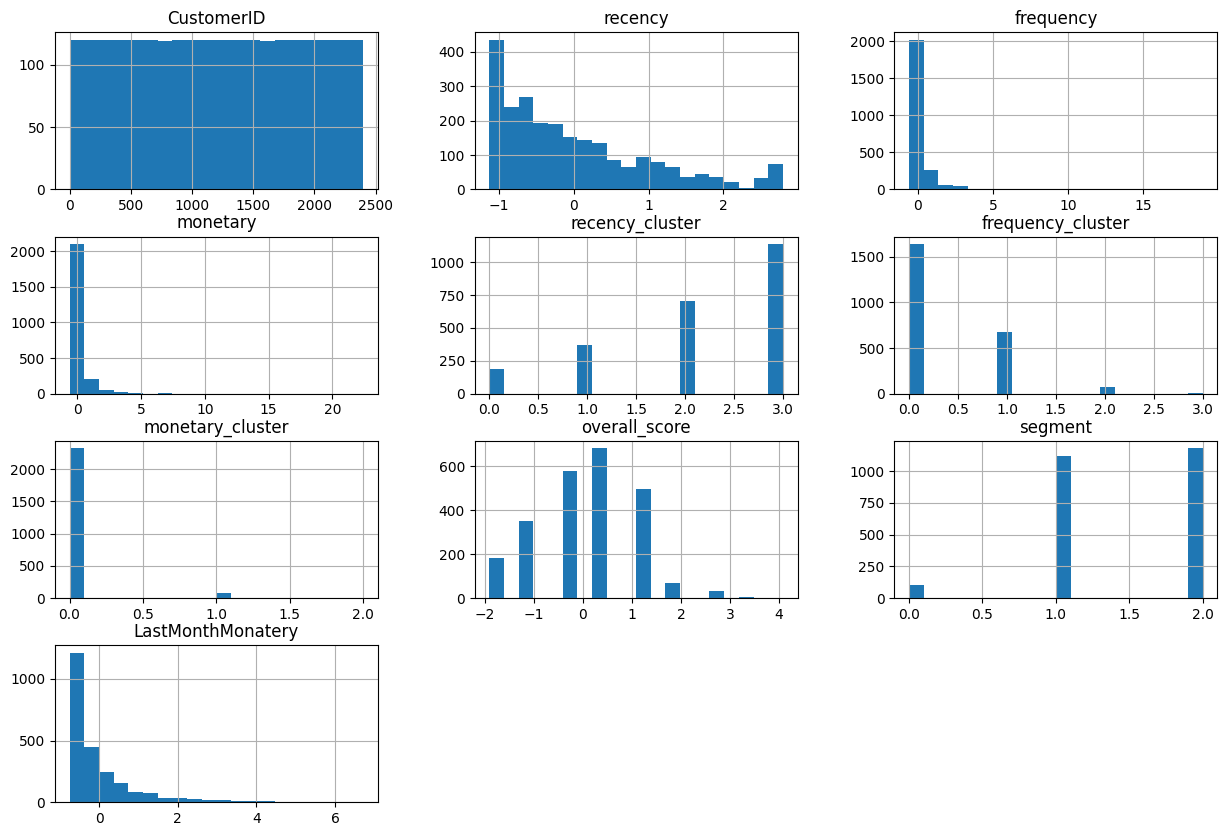

In [577]:
clv_data_ml.hist(bins=20, figsize=(15,10))

In [578]:
clv_data_ml.describe()

,CustomerID,recency,frequency,monetary,recency_cluster,frequency_cluster,monetary_cluster,overall_score,segment,LastMonthMonatery
count,2398.000000,2.398000e+03,2.398000e+03,2.398000e+03,2398.000000,2398.000000,2398.000000,2.398000e+03,2398.000000,2.398000e+03
mean,1198.500000,-7.037277e-17,-3.111217e-17,5.481668e-17,2.164304,0.351543,0.030859,6.074281e-17,1.448290,4.444596e-17
std,692.387295,1.000209e+00,1.000209e+00,1.000209e+00,0.955249,0.550590,0.177730,1.000209e+00,0.578104,1.000209e+00
min,0.000000,-1.129289e+00,-5.927085e-01,-6.028474e-01,0.000000,0.000000,0.000000,-1.904418e+00,0.000000,-7.502727e-01
25%,599.250000,-7.709909e-01,-5.927085e-01,-4.571236e-01,2.000000,0.000000,0.000000,-4.088247e-01,1.000000,-6.010428e-01
50%,1198.500000,-2.986884e-01,-3.479496e-01,-2.822550e-01,2.000000,0.000000,0.000000,3.389721e-01,1.000000,-3.838922e-01
75%,1797.750000,5.156262e-01,1.415682e-01,9.798530e-02,3.000000,1.000000,0.000000,1.086769e+00,2.000000,1.799648e-01
max,2397.000000,2.795707e+00,1.898800e+01,2.240175e+01,3.000000,3.000000,2.000000,4.077956e+00,2.000000,6.712526e+00


<Axes: >

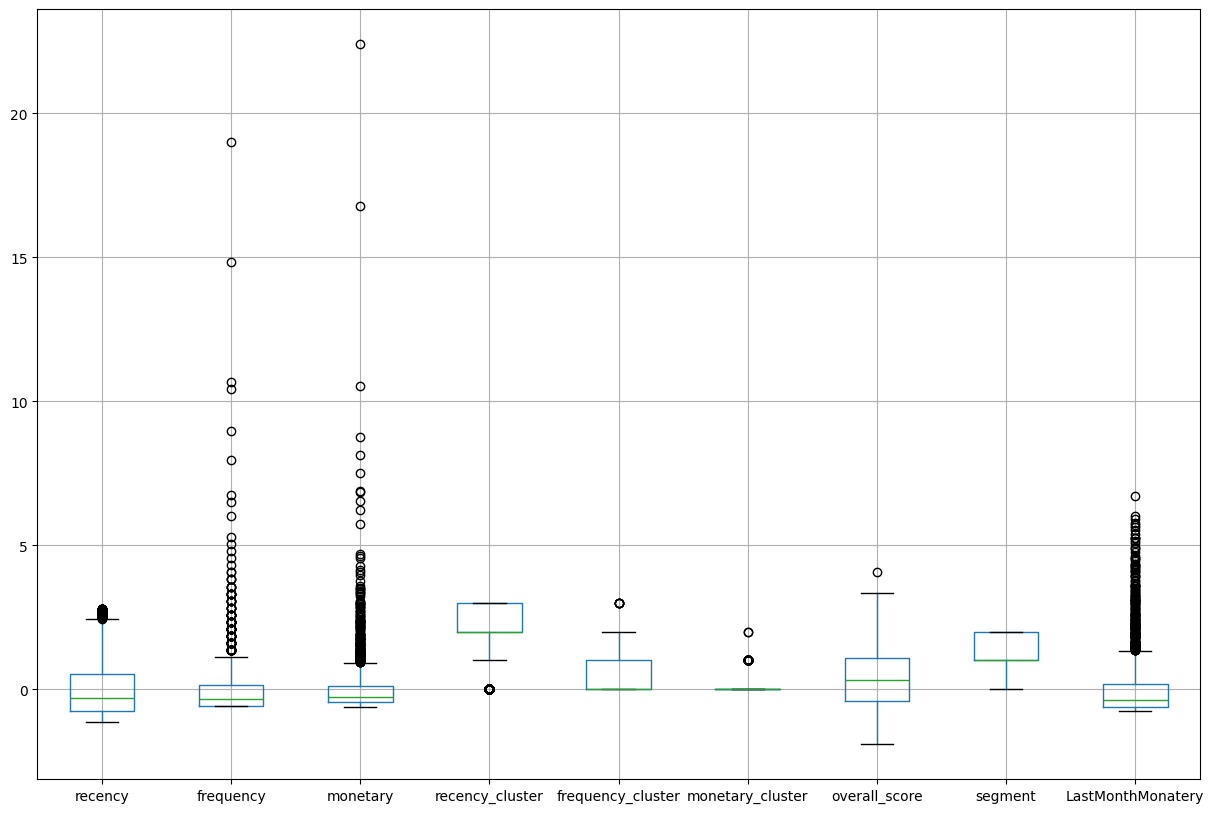

In [579]:
clv_data_ml.drop(columns='CustomerID').boxplot(figsize=(15,10))

In [580]:
# Using LastMonthMonetary as target variable

X = clv_data_ml.drop(columns=['LastMonthMonatery'])
y = clv_data_ml['LastMonthMonatery']

In [581]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [582]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

In [583]:
models = {
    'name': [],
	'model': [],
    'pred': [],
    'mae': [],
    'mape': [],
    'mse': [],
    'rmse': [],
    'r2': []
}
i=0

In [584]:
models['model'].append(LinearRegression())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Linear Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Linear Regression:
MAE: 0.5082384703884985
MAPE: 2.451945604226047
MSE: 0.7411223838350757
R2: 0.32477693548986986


In [585]:
models['model'].append(Lasso(alpha=1.0, max_iter=2000))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Lasso Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Lasso Regression:
MAE: 0.6795566580447591
MAPE: 1.1443154600185623
MSE: 1.08783797012227
R2: 0.008890698894480242


In [586]:
models['model'].append(Ridge(alpha=1.0, max_iter=2000))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Ridge Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Ridge Regression:
MAE: 0.5078985151198464
MAPE: 2.450488760995977
MSE: 0.7406501499791467
R2: 0.3252071791288702


In [587]:
models['model'].append(ElasticNet(alpha=1.0, max_iter=2000))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('ElasticNet Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

ElasticNet Regression:
MAE: 0.6575528432462244
MAPE: 1.1761141484153532
MSE: 1.0175683454712958
R2: 0.07291207017364809


In [588]:
models['model'].append(SVR(kernel='rbf', C=1.0))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('SVR')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

SVR:
MAE: 0.6005786511735518
MAPE: 2.968500443900843
MSE: 1.2192006850502868
R2: -0.11079147083985696


In [589]:
models['model'].append(RandomForestRegressor(
        random_state=42,
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=2,
        max_features='sqrt',
        max_depth=6,
        oob_score=True
    ))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Random Forest Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Random Forest Regressor:
MAE: 0.46161201552772074
MAPE: 2.3987147426720514
MSE: 0.6008184475701772
R2: 0.4526052886390316


In [590]:
models['model'].append(GradientBoostingRegressor(
    random_state=42,
    n_estimators=400,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8
))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Gradient Boosting')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Gradient Boosting:
MAE: 0.4620145999760624
MAPE: 2.3247334366908934
MSE: 0.6017648787882384
R2: 0.45174301244640014


In [591]:
models['model'].append(KNeighborsRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('K Neighbors Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

K Neighbors Regressor:
MAE: 0.6664846886436556
MAPE: 2.989189207097653
MSE: 1.099548547301654
R2: -0.0017785940356949137


In [592]:
models['model'].append(DecisionTreeRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Decision Tree Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Decision Tree Regressor:
MAE: 0.6557292006281841
MAPE: 4.609751403168264
MSE: 1.2428064187058327
R2: -0.13229822352546283


In [593]:
models['model'].append(XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=200,
    min_child_weight=1,
    max_depth=4,
    learning_rate=0.01,
    gamma=0.1,
    colsample_bytree=0.8
))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('XGB Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

XGB Regressor:
MAE: 0.4669837985878492
MAPE: 2.135560564441381
MSE: 0.6110875256717176
R2: 0.4432493191842499


In [594]:
results = pd.DataFrame({
    'name': models['name'],
    'mae': models['mae'],
    'mape': models['mape'],
    'mse': models['mse'],
    'rsme': models['rmse'],
    'r2': models['r2']
})

results

,name,mae,mape,mse,rsme,r2
0,Linear Regression,0.508238,2.451946,0.741122,0.860885,0.324777
1,Lasso Regression,0.679557,1.144315,1.087838,1.042995,0.008891
2,Ridge Regression,0.507899,2.450489,0.740650,0.860610,0.325207
3,ElasticNet Regression,0.657553,1.176114,1.017568,1.008746,0.072912
4,SVR,0.600579,2.968500,1.219201,1.104174,-0.110791
5,Random Forest Regressor,0.461612,2.398715,0.600818,0.775125,0.452605
6,Gradient Boosting,0.462015,2.324733,0.601765,0.775735,0.451743
7,K Neighbors Regressor,0.666485,2.989189,1.099549,1.048594,-0.001779
8,Decision Tree Regressor,0.655729,4.609751,1.242806,1.114812,-0.132298
9,XGB Regressor,0.466984,2.135561,0.611088,0.781721,0.443249


Models which performed the best in Regression:

1. Random Forest
2. Gradient Boosting
3. XGB Regressor